In [1]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


In [2]:
data = pd.read_csv('model_df.csv', index_col=0)

In [3]:
data

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,68476807,10400.0,60 months,22.45,289.91,F,F1,3,MORTGAGE,104433.0,2015-12-01,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,Individual,0.128894,17.5
13,66624733,18000.0,60 months,19.48,471.70,E,E2,7,RENT,150000.0,2015-12-01,debt_consolidation,CA,9.39,0.0,2005-06-01,665.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,Individual,-0.474848,10.5
19,68495092,8650.0,36 months,19.89,320.99,E,E3,8,RENT,55000.0,2015-12-01,debt_consolidation,IN,25.49,0.0,2005-03-01,675.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,Individual,0.062484,10.8
27,68526907,16000.0,60 months,17.97,406.04,D,D4,1,MORTGAGE,109000.0,2015-12-01,debt_consolidation,NM,23.35,0.0,2002-04-01,680.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,Individual,0.091973,13.7
31,68341789,24250.0,60 months,24.24,701.01,F,F3,4,MORTGAGE,75000.0,2015-12-01,debt_consolidation,NY,20.84,0.0,2007-04-01,660.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,Individual,-0.829921,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260514,90195681,6400.0,36 months,19.99,237.82,D,D4,0,MORTGAGE,18876.0,2016-10-01,debt_consolidation,NY,12.84,0.0,2006-05-01,670.0,674.0,0.0,5.0,1.0,7380.0,70.3,11.0,0.0,0.0,0.0,Individual,0.162377,10.4
2260535,90229508,30000.0,60 months,17.99,761.64,D,D2,10,RENT,130000.0,2016-10-01,debt_consolidation,NY,10.54,0.0,1997-10-01,695.0,699.0,2.0,17.0,0.0,21536.0,36.4,39.0,0.0,0.0,0.0,Individual,0.110282,19.0
2260541,90155344,7000.0,36 months,16.99,249.54,D,D1,1,RENT,68000.0,2016-10-01,debt_consolidation,TX,12.60,0.0,2004-07-01,665.0,669.0,1.0,7.0,0.0,4897.0,85.9,15.0,0.0,0.0,0.0,Individual,0.119273,12.3
2260547,90265158,19200.0,60 months,17.99,487.45,D,D2,10,RENT,55000.0,2016-10-01,debt_consolidation,FL,28.47,1.0,2002-05-01,670.0,674.0,0.0,20.0,1.0,12698.0,44.6,33.0,0.0,0.0,0.0,Individual,-0.410815,14.4


In [4]:
drop_cols = ['earliest_cr_line', 'grade', 'id', 'fico_range_low', 'issue_d']
data= data.drop(drop_cols,axis=1)

(0, 50)

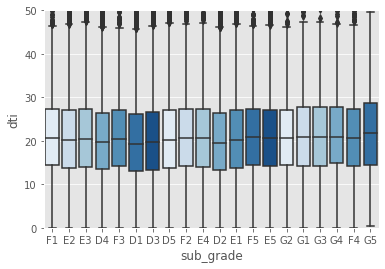

In [5]:
import seaborn as sns

sns.boxplot(x='sub_grade', y='dti' , data=data, palette = sns.color_palette("Blues", n_colors=7))
plt.ylim(0,50)

## Random Forest

In [6]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [7]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,10400.0,60 months,22.45,289.91,F1,3,MORTGAGE,104433.0,major_purchase,PA,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,Individual,0.128894,17.5
13,18000.0,60 months,19.48,471.70,E2,7,RENT,150000.0,debt_consolidation,CA,9.39,0.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,Individual,-0.474848,10.5
19,8650.0,36 months,19.89,320.99,E3,8,RENT,55000.0,debt_consolidation,IN,25.49,0.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,Individual,0.062484,10.8
27,16000.0,60 months,17.97,406.04,D4,1,MORTGAGE,109000.0,debt_consolidation,NM,23.35,0.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,Individual,0.091973,13.7
31,24250.0,60 months,24.24,701.01,F3,4,MORTGAGE,75000.0,debt_consolidation,NY,20.84,0.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,Individual,-0.829921,8.7


In [8]:
le = LabelEncoder()

In [9]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    data[feature]=le.fit_transform(data[feature])
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,10400.0,1,22.45,289.91,10,3,1,104433.0,6,38,25.37,1.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0.0,0,0.128894,17.5
13,18000.0,1,19.48,471.70,6,7,5,150000.0,2,4,9.39,0.0,669.0,1.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,0.0,0,-0.474848,10.5
19,8650.0,0,19.89,320.99,7,8,5,55000.0,2,15,25.49,0.0,679.0,4.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,0.0,0,0.062484,10.8
27,16000.0,1,17.97,406.04,3,1,1,109000.0,2,32,23.35,0.0,684.0,1.0,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,0.0,0,0.091973,13.7
31,24250.0,1,24.24,701.01,12,4,1,75000.0,2,34,20.84,0.0,664.0,0.0,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,0.0,0,-0.829921,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260514,6400.0,0,19.99,237.82,3,0,1,18876.0,2,34,12.84,0.0,674.0,0.0,5.0,1.0,7380.0,70.3,11.0,0.0,0.0,0.0,0,0.162377,10.4
2260535,30000.0,1,17.99,761.64,1,10,5,130000.0,2,34,10.54,0.0,699.0,2.0,17.0,0.0,21536.0,36.4,39.0,0.0,0.0,0.0,0,0.110282,19.0
2260541,7000.0,0,16.99,249.54,0,1,5,68000.0,2,43,12.60,0.0,669.0,1.0,7.0,0.0,4897.0,85.9,15.0,0.0,0.0,0.0,0,0.119273,12.3
2260547,19200.0,1,17.99,487.45,1,10,5,55000.0,2,9,28.47,1.0,674.0,0.0,20.0,1.0,12698.0,44.6,33.0,0.0,0.0,0.0,0,-0.410815,14.4


In [10]:
Xrf = data.drop('roi_percent', axis=1)
yrf = data['roi_percent']


In [11]:
from sklearn.model_selection import train_test_split

Xrf_train,Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf)

In [12]:
randomForest = ensemble.RandomForestRegressor()

grid_param_forest = [{
    "n_estimators": [100,250,500],
    "max_features": [2,3,4,5],
    "random_state": [42]}]

grid_randomForest= GridSearchCV(estimator = randomForest,param_grid=grid_param_forest, scoring='r2',cv=5)


grid_randomForest.fit(Xrf_train,yrf_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 3, 4, 5],


In [13]:
grid_randomForest.best_params_


{'max_features': 5, 'n_estimators': 500, 'random_state': 42}

In [14]:
top_forest = grid_randomForest.best_estimator_


In [15]:
grid_randomForest.best_score_




0.057441761642110074

In [16]:
grid_randomForest.predict(Xrf_train)

array([-0.05525302,  0.19655834,  0.03531024, ...,  0.08528705,
        0.10526693,  0.35878155])

In [17]:
joint = Xrf_train.copy()

joint['prediction'] = grid_randomForest.predict(Xrf_train)

rf_joint_df1 = pd.concat([joint,yrf_train],axis=1)
rf_joint_df1

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,roi_percent
278170,25000.0,1,20.99,676.20,9,1,5,65000.0,4,43,20.16,3.0,679.0,1.0,7.0,1.0,3656.0,10.1,17.0,0.0,0.0,0.0,0,12.0,-0.055253,0.037048
98108,34125.0,1,19.99,903.92,8,10,1,99000.0,2,9,8.41,1.0,664.0,1.0,9.0,0.0,11763.0,94.9,33.0,0.0,0.0,1.0,0,16.6,0.196558,0.248720
1784364,13300.0,1,19.52,348.83,3,0,1,50000.0,2,43,18.12,0.0,759.0,0.0,6.0,0.0,85.0,0.8,11.0,0.0,0.0,0.0,0,10.8,0.035310,0.155050
2007511,24000.0,1,19.99,635.72,3,1,5,65000.0,2,14,4.01,0.0,719.0,0.0,14.0,0.0,10070.0,23.3,18.0,0.0,0.0,0.0,0,4.8,-0.643002,-0.868669
2099391,12000.0,1,17.09,298.82,0,10,5,41000.0,2,15,37.41,0.0,674.0,0.0,17.0,1.0,14599.0,48.2,31.0,0.0,0.0,0.0,0,17.0,0.066130,0.171335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239662,10000.0,1,15.61,241.12,0,10,5,36400.0,2,4,21.89,0.0,714.0,1.0,10.0,0.0,16339.0,59.8,15.0,0.0,0.0,0.0,0,13.6,0.262360,0.419890
456400,30000.0,1,17.47,753.18,0,10,1,210000.0,9,4,3.68,0.0,674.0,0.0,6.0,1.0,8.0,0.1,15.0,0.0,0.0,1.0,0,24.0,-0.005091,0.001602
2180524,35000.0,0,17.99,1265.16,1,1,1,130000.0,2,4,21.23,0.0,689.0,1.0,24.0,3.0,32872.0,23.5,36.0,0.0,0.0,0.0,1,6.3,0.085287,0.152702
958363,1200.0,0,17.99,43.38,1,2,1,41000.0,9,48,20.05,0.0,709.0,2.0,5.0,1.0,5915.0,28.6,14.0,0.0,0.0,0.0,0,13.6,0.105267,0.149771


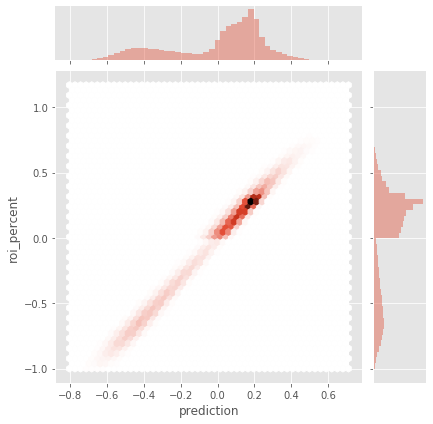

In [18]:
sns.jointplot(x='prediction', y='roi_percent',data=rf_joint_df1, kind='hex')

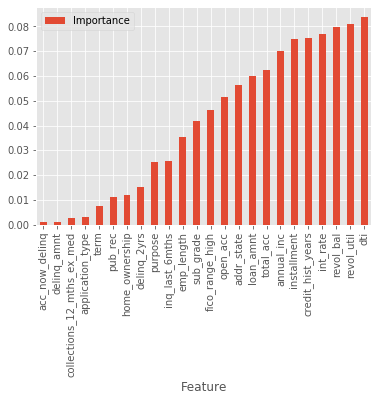

In [19]:
feature_importance=pd.DataFrame(zip(list(top_forest.feature_importances_),Xrf_train.columns))
feature_importance.columns = ['Importance','Feature']
feature_importance.sort_values('Importance').plot.bar(x='Feature',y='Importance')

In [20]:
t = rf_joint_df1[rf_joint_df1['prediction']>.05]

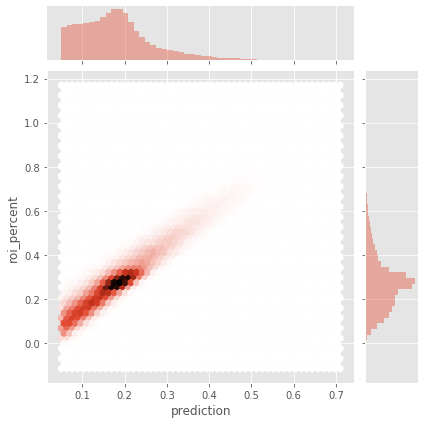

In [21]:
sns.jointplot(x='prediction', y='roi_percent',data=t, kind='hex')

In [23]:
top_forest.score(Xrf_test,yrf_test)

0.059443934333325614

In [24]:
joint_test = Xrf_test.copy()

joint_test['test_prediction'] = top_forest.predict(Xrf_test)

In [25]:
joint_test

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction
63654,32500.0,1,18.49,833.98,6,10,5,65000.0,6,34,14.81,0.0,749.0,0.0,12.0,0.0,2543.0,8.1,36.0,0.0,0.0,0.0,0,16.0,-0.181105
1138227,12350.0,0,21.99,471.59,9,0,1,36468.0,2,38,13.29,0.0,694.0,2.0,14.0,0.0,59552.0,51.0,29.0,0.0,0.0,0.0,0,13.1,-0.058910
2212186,32000.0,1,21.49,874.56,4,9,1,83000.0,1,48,29.71,0.0,679.0,0.0,27.0,0.0,24654.0,41.3,38.0,0.0,0.0,0.0,0,13.8,-0.083201
288391,15000.0,1,18.25,382.95,5,3,4,55000.0,1,19,23.63,1.0,684.0,2.0,18.0,0.0,15173.0,47.7,43.0,0.0,0.0,0.0,0,22.2,-0.021145
1643187,10000.0,0,19.04,366.78,12,10,5,96000.0,2,9,20.77,1.0,669.0,1.0,17.0,0.0,22619.0,67.0,23.0,0.0,0.0,0.0,0,20.3,0.097299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,11800.0,0,15.77,413.52,0,10,1,75000.0,2,1,21.86,5.0,674.0,1.0,17.0,0.0,13530.0,84.0,37.0,0.0,0.0,0.0,0,22.8,0.076141
1778615,10625.0,0,17.76,382.85,0,7,4,33000.0,2,34,12.18,1.0,664.0,1.0,4.0,0.0,6896.0,88.4,13.0,0.0,0.0,0.0,0,27.7,0.109243
319254,32000.0,1,17.86,810.16,4,9,1,97000.0,2,1,35.70,0.0,724.0,0.0,13.0,0.0,42642.0,84.8,27.0,0.0,0.0,0.0,0,20.5,0.067482
1301868,20475.0,1,18.25,522.72,2,1,5,55000.0,2,4,28.47,0.0,664.0,0.0,9.0,2.0,4555.0,36.4,59.0,0.0,0.0,0.0,0,22.1,-0.102891


In [27]:
rf_joint_df2= pd.concat([joint_test,yrf_test],axis=1)

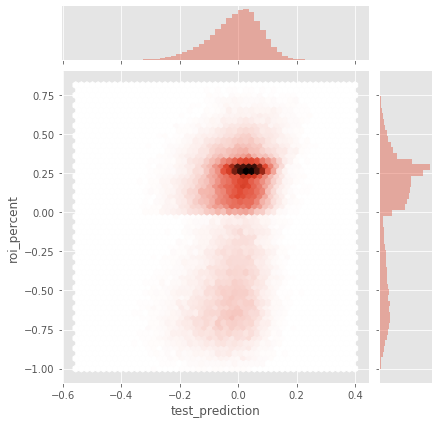

In [28]:
sns.jointplot(x='test_prediction', y='roi_percent',data=rf_joint_df2, kind='hex')

In [34]:
t = rf_joint_df2[rf_joint_df2['test_prediction']>.10]

In [36]:
t

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,roi_percent
1764241,35000.0,1,20.20,931.19,4,10,1,125000.0,9,34,20.20,0.0,704.0,1.0,18.0,0.0,30758.0,88.9,41.0,0.0,0.0,0.0,0,23.0,0.132454,0.603219
1633030,15250.0,1,15.20,364.40,3,10,1,98279.0,2,34,23.41,0.0,704.0,1.0,15.0,0.0,44685.0,51.0,44.0,0.0,0.0,0.0,0,19.8,0.103110,-0.697810
260927,3175.0,0,17.57,114.11,3,10,1,40000.0,2,42,4.38,0.0,664.0,2.0,9.0,1.0,5004.0,48.6,39.0,0.0,0.0,0.0,0,22.1,0.106208,0.091745
1875330,3000.0,0,18.49,109.20,1,4,5,52000.0,9,43,28.43,0.0,694.0,0.0,10.0,0.0,23892.0,76.8,25.0,0.0,0.0,0.0,0,24.3,0.101910,0.310337
1214557,6050.0,0,22.15,231.53,9,10,1,109000.0,9,20,17.86,0.0,664.0,0.0,9.0,1.0,40778.0,93.1,44.0,0.0,0.0,0.0,0,29.3,0.119967,0.377632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821442,7750.0,0,18.25,281.16,1,8,5,68000.0,6,9,13.61,0.0,699.0,1.0,4.0,0.0,9888.0,89.9,8.0,0.0,0.0,0.0,0,9.2,0.106023,0.072795
1802757,2000.0,0,21.15,75.51,6,6,5,25000.0,9,24,17.52,0.0,674.0,1.0,12.0,0.0,8893.0,64.2,14.0,0.0,0.0,0.0,0,5.6,0.183732,0.343975
1292790,28550.0,1,20.49,764.21,6,10,1,65000.0,2,3,29.89,0.0,694.0,0.0,13.0,0.0,12979.0,93.4,39.0,0.0,0.0,0.0,0,10.8,0.140075,0.416033
1201804,1600.0,0,20.20,59.63,7,7,5,34000.0,9,4,31.31,0.0,679.0,0.0,5.0,0.0,3915.0,81.6,9.0,0.0,0.0,0.0,0,20.8,0.129654,0.341519


In [47]:
len(t[t['roi_percent']<-.])/len(t)

0.17850014257199887

In [48]:
len(rf_joint_df2[rf_joint_df2['roi_percent']<-.15])/len(rf_joint_df2)

0.289195959020383

In [51]:
t['int_rate'].describe()

count    7014.000000
mean       19.579036
std         2.624019
min         6.000000
25%        17.570000
50%        19.190000
75%        21.490000
max        26.060000
Name: int_rate, dtype: float64

In [50]:
rf_joint_df2['int_rate'].describe()

count    84237.000000
mean        19.605520
std          3.315941
min          6.000000
25%         17.270000
50%         18.790000
75%         21.450000
max         30.990000
Name: int_rate, dtype: float64

In [52]:
t['roi_percent'].describe()

count    7014.000000
mean        0.147930
std         0.359188
min        -1.000000
25%         0.048548
50%         0.247790
75%         0.364151
max         0.795784
Name: roi_percent, dtype: float64

In [53]:
rf_joint_df2['roi_percent'].describe()

count    84237.000000
mean         0.002407
std          0.395657
min         -1.000000
25%         -0.293789
50%          0.137401
75%          0.281311
max          0.811895
Name: roi_percent, dtype: float64

In [54]:
rf_joint_df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,roi_percent
63654,32500.0,1,18.49,833.98,6,10,5,65000.0,6,34,14.81,0.0,749.0,0.0,12.0,0.0,2543.0,8.1,36.0,0.0,0.0,0.0,0,16.0,-0.181105,0.166578
1138227,12350.0,0,21.99,471.59,9,0,1,36468.0,2,38,13.29,0.0,694.0,2.0,14.0,0.0,59552.0,51.0,29.0,0.0,0.0,0.0,0,13.1,-0.058910,0.116347
2212186,32000.0,1,21.49,874.56,4,9,1,83000.0,1,48,29.71,0.0,679.0,0.0,27.0,0.0,24654.0,41.3,38.0,0.0,0.0,0.0,0,13.8,-0.083201,-0.470566
288391,15000.0,1,18.25,382.95,5,3,4,55000.0,1,19,23.63,1.0,684.0,2.0,18.0,0.0,15173.0,47.7,43.0,0.0,0.0,0.0,0,22.2,-0.021145,-0.006358
1643187,10000.0,0,19.04,366.78,12,10,5,96000.0,2,9,20.77,1.0,669.0,1.0,17.0,0.0,22619.0,67.0,23.0,0.0,0.0,0.0,0,20.3,0.097299,0.322922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,11800.0,0,15.77,413.52,0,10,1,75000.0,2,1,21.86,5.0,674.0,1.0,17.0,0.0,13530.0,84.0,37.0,0.0,0.0,0.0,0,22.8,0.076141,0.200836
1778615,10625.0,0,17.76,382.85,0,7,4,33000.0,2,34,12.18,1.0,664.0,1.0,4.0,0.0,6896.0,88.4,13.0,0.0,0.0,0.0,0,27.7,0.109243,0.297147
319254,32000.0,1,17.86,810.16,4,9,1,97000.0,2,1,35.70,0.0,724.0,0.0,13.0,0.0,42642.0,84.8,27.0,0.0,0.0,0.0,0,20.5,0.067482,0.303734
1301868,20475.0,1,18.25,522.72,2,1,5,55000.0,2,4,28.47,0.0,664.0,0.0,9.0,2.0,4555.0,36.4,59.0,0.0,0.0,0.0,0,22.1,-0.102891,0.006665
